<a href="https://colab.research.google.com/github/anasbinayub/Object-Detection-Using-Faster-R-CNN/blob/main/Object_Detection_using_Faster_R_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torchvision
from torchvision import transforms as T
from PIL import Image
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)

/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
model.eval()

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
ig = Image.open("/content/drive/My Drive/RCNN/beach.jpg")

In [ ]:
transform = T.ToTensor() #convert image to the tensor formet
img = transform(ig)

with torch.no_grad(): # not using gradian function of pytorch and gradian won't calculated
  pred = model([img])

In [ ]:
pred

[{'boxes': tensor([[ 627.5095,  478.5055,  683.1995,  628.9171],
          [   0.0000,  145.9958,  687.9992,  357.1805],
          [ 814.9227,  446.3285,  870.7133,  600.9039],
          [ 581.8183,  528.0860,  593.9774,  551.5300],
          [ 761.4390,  466.3445,  815.9202,  614.4576],
          [ 207.6003,  541.3774,  219.6475,  552.2982],
          [ 755.4664,  468.3459,  761.0146,  482.6859],
          [ 845.9108,  439.1979,  878.3421,  521.0013],
          [ 951.2271,  435.0856,  984.0778,  529.0209],
          [ 227.9108,  543.1695,  236.1730,  552.3279],
          [ 930.5580,  445.7780,  943.1373,  485.2567],
          [ 221.6651,  543.2661,  235.4064,  554.1373],
          [ 817.1587,  581.9221,  859.5192,  632.7885],
          [ 207.2935,  541.0734,  229.1123,  554.0099],
          [ 883.4706,  465.3835,  898.0319,  486.1560],
          [ 206.2775,  547.7424,  231.3923,  554.6727],
          [ 914.4361,  445.8030,  929.9728,  481.7147],
          [ 976.1089,  435.5959,  990.2

In [ ]:
type(pred)

list

In [ ]:
len(pred)

1

In [ ]:
pred[0]

{'boxes': tensor([[ 627.5095,  478.5055,  683.1995,  628.9171],
         [   0.0000,  145.9958,  687.9992,  357.1805],
         [ 814.9227,  446.3285,  870.7133,  600.9039],
         [ 581.8183,  528.0860,  593.9774,  551.5300],
         [ 761.4390,  466.3445,  815.9202,  614.4576],
         [ 207.6003,  541.3774,  219.6475,  552.2982],
         [ 755.4664,  468.3459,  761.0146,  482.6859],
         [ 845.9108,  439.1979,  878.3421,  521.0013],
         [ 951.2271,  435.0856,  984.0778,  529.0209],
         [ 227.9108,  543.1695,  236.1730,  552.3279],
         [ 930.5580,  445.7780,  943.1373,  485.2567],
         [ 221.6651,  543.2661,  235.4064,  554.1373],
         [ 817.1587,  581.9221,  859.5192,  632.7885],
         [ 207.2935,  541.0734,  229.1123,  554.0099],
         [ 883.4706,  465.3835,  898.0319,  486.1560],
         [ 206.2775,  547.7424,  231.3923,  554.6727],
         [ 914.4361,  445.8030,  929.9728,  481.7147],
         [ 976.1089,  435.5959,  990.2144,  460.1598],
 

In [ ]:
type(pred[0])

dict

In [ ]:
pred[0].keys()

dict_keys(['boxes', 'labels', 'scores'])

In [ ]:
boxes , labels , scores = pred[0]['boxes'] , pred[0]['labels'] , pred[0]['scores']

In [ ]:
scores

tensor([0.9997, 0.9993, 0.9907, 0.9869, 0.9814, 0.9506, 0.9271, 0.9183, 0.9112,
        0.8785, 0.8149, 0.8052, 0.7567, 0.7418, 0.5427, 0.5205, 0.4916, 0.4192,
        0.3902, 0.3545, 0.3361, 0.3267, 0.2747, 0.2632, 0.2541, 0.2466, 0.2245,
        0.2070, 0.1857, 0.1850, 0.1779, 0.1729, 0.1674, 0.1630, 0.1563, 0.1485,
        0.1454, 0.1380, 0.1348, 0.1336, 0.1287, 0.1249, 0.1237, 0.1233, 0.1230,
        0.1075, 0.0922, 0.0871, 0.0841, 0.0833, 0.0806, 0.0782, 0.0777, 0.0700,
        0.0682, 0.0671, 0.0670, 0.0647, 0.0626, 0.0624, 0.0620, 0.0527, 0.0508,
        0.0504])

In [ ]:
num = torch.argwhere(scores > 0.2).shape[0] #there are only 6 values in scores which are grater than 0.9

In [ ]:
num

28

In [ ]:
# name of all the classes
coco_names = ["person" , "bicycle" , "car" , "motorcycle" , "airplane" , "bus" , "train" , "truck" , "boat" , "traffic light" , "fire hydrant" , "street sign" , "stop sign" , "parking meter" , "bench" , "bird" , "cat" , "dog" , "horse" , "sheep" , "cow" , "elephant" , "bear" , "zebra" , "giraffe" , "hat" , "backpack" , "umbrella" , "shoe" , "eye glasses" , "handbag" , "tie" , "suitcase" ,
"frisbee" , "skis" , "snowboard" , "sports ball" , "kite" , "baseball bat" ,
"baseball glove" , "skateboard" , "surfboard" , "tennis racket" , "bottle" ,
"plate" , "wine glass" , "cup" , "fork" , "knife" , "spoon" , "bowl" ,
"banana" , "apple" , "sandwich" , "orange" , "broccoli" , "carrot" , "hot dog" ,
"pizza" , "donut" , "cake" , "chair" , "couch" , "potted plant" , "bed" ,
"mirror" , "dining table" , "window" , "desk" , "toilet" , "door" , "tv" ,
"laptop" , "mouse" , "remote" , "keyboard" , "cell phone" , "microwave" ,
"oven" , "toaster" , "sink" , "refrigerator" , "blender" , "book" ,
"clock" , "vase" , "scissors" , "teddy bear" , "hair drier" , "toothbrush" , "hair brush"]

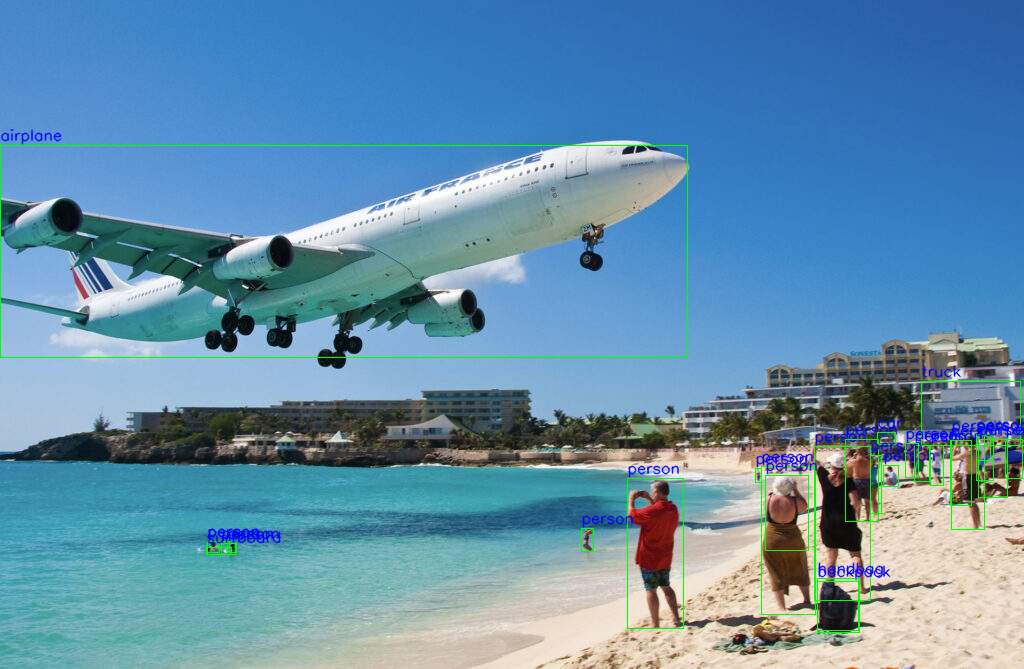

In [ ]:
image_path = '/content/drive/My Drive/RCNN/beach.jpg'
igg = cv2.imread(image_path)

for i in range(num):
  x1, y1, x2, y2 = boxes[i].numpy().astype('int')
  class_name = coco_names[labels[i].numpy()-1]
  igg = cv2.rectangle(igg, (x1, y1), (x2, y2), (0, 255, 0), 1)
  igg = cv2.putText(igg, class_name, (x1, y1-5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1, cv2.LINE_AA)

cv2_imshow(igg)